In [1]:
# Importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# This function is designed to read files and, where need be, visualise line plots.

def read_file_for_line_plot(filepath, plot=True, corrupt=True):
   
    # Loading an incoming file into a Pandas DataFrame
    # Based upon all the csv files at hand, as our actual column names are on the second row, we're using header=1
    
    file = pd.read_csv(filepath, header=1) 
    
    # As we may have multiple categorical files, depending upon which csv file we may feed into this function,
    # We are first setting the index as our datetime parameter in order not to forfeit this data and then 
    # transpose our categorical variables into rows. Once we are done with this data manipulation technique
    # we are resetting the index back.
    
    df = file.set_index('Week').stack().reset_index() 
    

    df.columns = ['week','workout_type: country','interest'] #Renaming our column names to make them more fitting
    df['week'] = pd.to_datetime(df['week']) #Converting our string-type time parameter into the datetime format
    
    if corrupt:
        df = df[df['interest'] != '<1'] #This is to handle corrupt data found in some datasets
        print('Warning: Data associated with <1 has now been fixed!')
        
    df['interest'] = df['interest'].astype(float) #For a float conversion from percentages
    

    # Setting our parameters to visualise a line plot:

    plt.figure(figsize=(8,3))
    sns.set(style='darkgrid', palette='Pastel2')
               
    if plot:
        sns.lineplot(data = df, x= 'week', y= 'interest', hue='workout_type: country')
        
    return df

# 1. Assessing Global Trend for Workout from 2018 to 2023

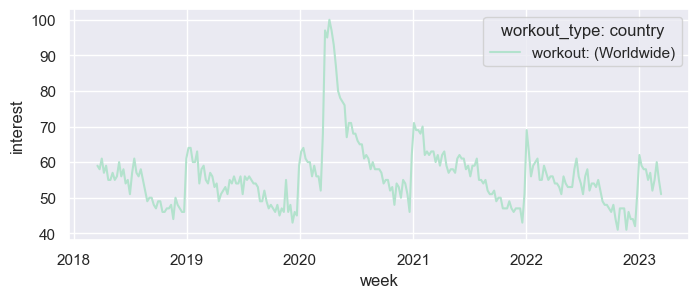

In [2]:
# Feeding the corresponding file into our customised function

workout_df = read_file_for_line_plot('Datasets/workout.csv', corrupt=False)

# 2. The Month-Year in Which Demand for Fitness is Highest

In [3]:
# Manipulating our datetime column into the 'Yyyy-mm' format to achieve the required classification

# Storing the resulting info in a new column named 'month_year'

workout_df['month_year'] = workout_df['week'].dt.strftime('%Y-%m')
# OR workout_df['date'] = workout_df['week'].apply(lambda x: x.strftime('%Y-%m'))

workout_df.drop(columns='workout_type: country', inplace=True) # Dropping columns we do not require for this analysis


# Renaming our column names

swapping_cols = ["month_year", "week", "interest"]
workout_df = workout_df[swapping_cols]

workout_df.set_index('month_year', inplace=True)


# Conducting required aggregate calculations

yearly_monthly_agg_interest = workout_df.groupby(workout_df.index).agg({'interest':'mean'})
yearly_monthly_agg_interest.sort_values(by=['interest'], ascending=False, inplace=True)

print(yearly_monthly_agg_interest)
print('\n')
print(f"The month-year in which demand for fitness the highest is {yearly_monthly_agg_interest.index[0]}.")


#Another way to approach it would be via the Resample function which only works on DateTimeIndex, as follows:

#workout_df.set_index('week', inplace=True)
#workout_df.drop(columns='workout_type: country', inplace=True)

#monthly_workout_df = workout_df.resample('MS').mean()
#monthly_workout_df.sort_values(by=['interest'], ascending=False, inplace=True) #Resample only works with a DateTime type Index

#peak_year_month = str(monthly_workout_df.index[0].date())
#print(f"The month-year in which demand for fitness the highest is " + peak_year_month) 

            interest
month_year          
2020-04        94.25
2020-05        75.60
2020-03        73.60
2020-06        69.50
2021-01        69.40
...              ...
2018-10        47.00
2019-10        46.50
2022-11        45.25
2022-12        45.25
2022-10        45.20

[61 rows x 1 columns]


The month-year in which demand for fitness the highest is 2020-04.


# 3. Which One of the Most Popular 3 Keywords Generated Highest Interest During Peak COVID in 2020 and 2022 Onwards?

The ranking of the most popular 3 keywords during peak-COVID in 2020:


                            interest
workout_type: country               
home workout: (Worldwide)  29.384615
home gym: (Worldwide)      21.250000
gym workout: (Worldwide)   13.769231


The ranking of the most popular 3 keywords during 2022 and 2023:


                            interest
workout_type: country               
gym workout: (Worldwide)   18.333333
home workout: (Worldwide)  13.285714
home gym: (Worldwide)      12.396825




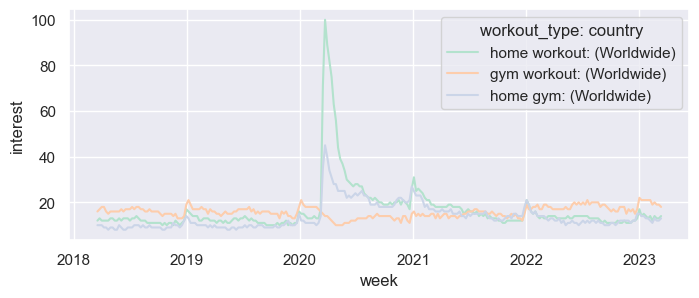

In [4]:
# Feeding the corresponding file into our customised function

three_keywords = read_file_for_line_plot('Datasets/three_keywords.csv', corrupt=False)


# Creating a new column 'year' only to include and group by the data based on this parameter

three_keywords['year'] = three_keywords['week'].dt.year


# Ranking Three Keywords during peak COVID in 2020:

print('The ranking of the most popular 3 keywords during peak-COVID in 2020:')
print('\n')

three_keywords_peak_covid = three_keywords[three_keywords['year'] == 2020].drop(columns=['week']) 
peak_covid = three_keywords_peak_covid.groupby(['workout_type: country']).agg({'interest':'mean'})
peak_covid.sort_values(by=['interest'], ascending=False, inplace=True)

print(peak_covid)
print('\n')


# Ranking Three Keywords for the time period - 2022 and 2023:

three_keywords_for_last_two_years = three_keywords[three_keywords['year'].isin([2022,2023])].drop(columns=['week'])
current = three_keywords_for_last_two_years.groupby(['workout_type: country']).agg({'interest':'mean'})
current.sort_values(by=['interest'], ascending=False, inplace=True)

print('The ranking of the most popular 3 keywords during 2022 and 2023:')
print('\n')
print(current)
print('\n')

# 4. Finding the Top 20 Countries with Highest Interest in Workout

United States is the top country with highest interest in workout over the past 5 years.




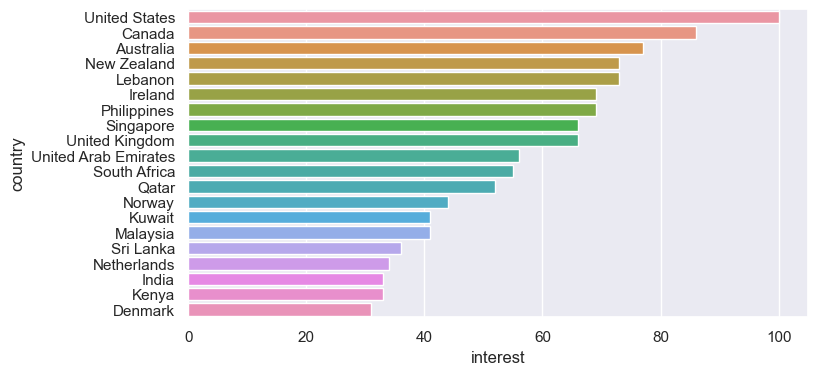

In [5]:
# Feeding the corresponding file into our customised function

workout_by_country = pd.read_csv('Datasets/workout_global.csv', header=1)

workout_by_country.columns = ['country', 'interest']
workout_by_country.sort_values(by=['interest'], ascending=False, inplace=True)


# Data Visualising via a Bar Plot

plt.figure(figsize=(8,4))
sns.set(style='darkgrid', palette='Set3')

sns.barplot(data = workout_by_country.dropna().iloc[:20,:], 
            y = 'country', x='interest') # via iLoc, picking only the top 20 c

top_country = workout_by_country.iloc[0,0]

print(f"{top_country} is the top country with highest interest in workout over the past 5 years.")
print('\n')

# 5. Breakdown of Top Middle Eastern and South Asian Countries by Top Three Fitness Keywords

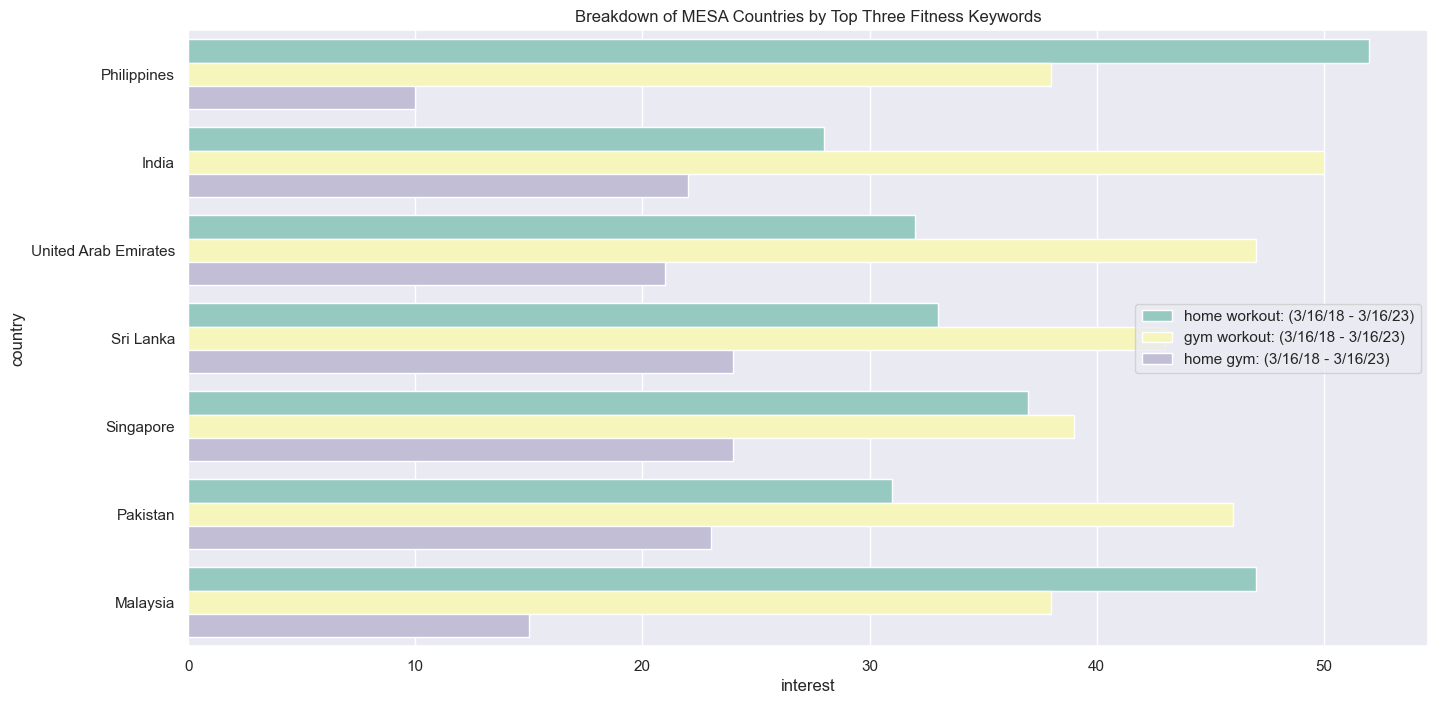

In [6]:
# Reading our corresponding file into a variable that I define

workout_by_country_categories = pd.read_csv('Datasets/geo_three_keywords.csv', header=1)


# As we do not this time call our customised function in here, we are manually doing the column transposition work
# by the stack() function:

workout_by_country_categories = workout_by_country_categories.set_index('Country').stack().reset_index()

workout_by_country_categories.columns = ['country','workout_type: category','interest'] # Renaming our column names

workout_by_country_categories['interest'] = pd.to_numeric(workout_by_country_categories['interest'].
                                                        apply(lambda x: x[:-1])) # Converting our percentages in string into numeric values


# Defining a subset of countries that we would like to focus on

MESA_countries = ['Philippines', 'Singapore', 'United Arab Emirates', 
                'Qatar', 'Kuwait', 'Lebanon', 'Malaysia', 'Sri Lanka', 'India', 'Pakistan']

MESA_country_categories = workout_by_country_categories.loc[workout_by_country_categories['country']
                                                            .isin(MESA_countries), :]

# After subsetting, it turns out that there is no data available for Qatar, Kuwait and Lebanon


# Visualising the resulting data via another Bar Plot

plt.figure(figsize=(16,8))
sns.barplot(data=MESA_country_categories.dropna(), y = 'country', x='interest', hue='workout_type: category')

plt.title('Breakdown of MESA Countries by Top Three Fitness Keywords')
plt.legend(loc='right')
plt.show()

## 5.1 Highlighting the conclusion that Philippines rank the highest in the keyword 'home workout' while ranking the lowest in 'home gym' among the MESA countries:

In [7]:
# Subsetting our initial MESA DataFrame based on the 'home' keyword

home_workout_and_gym_countries = MESA_country_categories[MESA_country_categories['workout_type: category'].
                            isin(['home workout: (3/16/18 - 3/16/23)', 'home gym: (3/16/18 - 3/16/23)'])]

print(home_workout_and_gym_countries)
print('\n')


# Second-level Subsetting

home_workout_countries = home_workout_and_gym_countries[home_workout_and_gym_countries['workout_type: category'] == 
                                                  'home workout: (3/16/18 - 3/16/23)']

top_home_workout = home_workout_countries[home_workout_countries.interest == home_workout_countries.interest.max()]    
top_home_workout.reset_index(inplace=True, drop=True)

print(top_home_workout)
print('\n')
print(f"The MESA country with the highest interest in home workouts is {top_home_workout.iloc[0,0]}.")

                 country             workout_type: category  interest
9            Philippines  home workout: (3/16/18 - 3/16/23)        52
11           Philippines      home gym: (3/16/18 - 3/16/23)        10
18                 India  home workout: (3/16/18 - 3/16/23)        28
20                 India      home gym: (3/16/18 - 3/16/23)        22
27  United Arab Emirates  home workout: (3/16/18 - 3/16/23)        32
29  United Arab Emirates      home gym: (3/16/18 - 3/16/23)        21
30             Sri Lanka  home workout: (3/16/18 - 3/16/23)        33
32             Sri Lanka      home gym: (3/16/18 - 3/16/23)        24
33             Singapore  home workout: (3/16/18 - 3/16/23)        37
35             Singapore      home gym: (3/16/18 - 3/16/23)        24
39              Pakistan  home workout: (3/16/18 - 3/16/23)        31
41              Pakistan      home gym: (3/16/18 - 3/16/23)        23
42              Malaysia  home workout: (3/16/18 - 3/16/23)        47
44              Mala

# 6. Looking at YouTube Keywords Searches for Philippines and also for Singapore for Comparison:

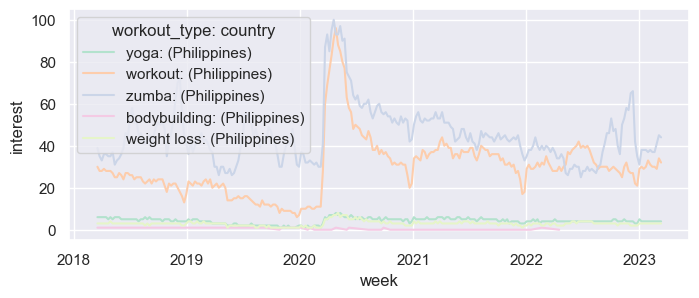

In [8]:
#Looking at YouTube keywords searches for Philippines:

pilot1 = read_file_for_line_plot('Datasets/yoga_zumba_phl.csv', corrupt=True)

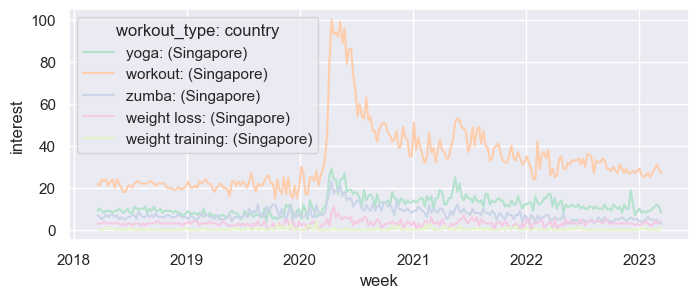

In [9]:
#Looking at YouTube keywords searches for Singapore:

pilot2 = read_file_for_line_plot('Datasets/yoga_zumba_sng.csv', corrupt=True)